## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
train, test = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tf.keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = tf.keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tf.keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = tf.keras.layers.BatchNormalization()(x)
        else:
            x = tf.keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1))(x)
            x = tf.keras.layers.BatchNormalization()(x)

    out = tf.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = tf.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
PATIENCE = [5, 10, 25]

In [8]:
results = {}

for patience in PATIENCE:
    tf.keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with patience = "+ str(patience))
    # 載入 Callbacks
    # patience: 經過多少epochs後仍然沒有改善模型效能時停止訓練
    earlystop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                          patience=patience,
                          verbose=1)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tf.keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              callbacks=[earlystop],
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "Patience" + str(patience)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with patience = 5
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 hidden_layer3 (Dense)       (No

Epoch 1/50
49/49 [==============================] - 7s 27ms/step - loss: 1.8367 - accuracy: 0.3668 - val_loss: 2.5128 - val_accuracy: 0.1691
Epoch 2/50
49/49 [==============================] - 1s 15ms/step - loss: 1.4996 - accuracy: 0.4753 - val_loss: 1.8248 - val_accuracy: 0.3478
Epoch 3/50
49/49 [==============================] - 1s 15ms/step - loss: 1.3907 - accuracy: 0.5102 - val_loss: 1.6434 - val_accuracy: 0.4026
Epoch 4/50
49/49 [==============================] - 1s 15ms/step - loss: 1.3180 - accuracy: 0.5359 - val_loss: 1.5675 - val_accuracy: 0.4420
Epoch 5/50
49/49 [==============================] - 1s 15ms/step - loss: 1.2499 - accuracy: 0.5594 - val_loss: 1.5671 - val_accuracy: 0.4453
Epoch 6/50
49/49 [==============================] - 1s 16ms/step - loss: 1.1873 - accuracy: 0.5826 - val_loss: 1.4990 - val_accuracy: 0.4659
Epoch 7/50
49/49 [==============================] - 1s 15ms/step - loss: 1.1324 - accuracy: 0.6028 - val_loss: 1.4847 - val_accuracy: 0.4710
Epoch 8/50
49

Epoch 1/50
49/49 [==============================] - 3s 31ms/step - loss: 1.8541 - accuracy: 0.3654 - val_loss: 2.1060 - val_accuracy: 0.2477
Epoch 2/50
49/49 [==============================] - 1s 19ms/step - loss: 1.4973 - accuracy: 0.4721 - val_loss: 1.7815 - val_accuracy: 0.3534
Epoch 3/50
49/49 [==============================] - 1s 17ms/step - loss: 1.3923 - accuracy: 0.5107 - val_loss: 1.6372 - val_accuracy: 0.4115
Epoch 4/50
49/49 [==============================] - 1s 15ms/step - loss: 1.3137 - accuracy: 0.5380 - val_loss: 1.5963 - val_accuracy: 0.4321
Epoch 5/50
49/49 [==============================] - 1s 19ms/step - loss: 1.2446 - accuracy: 0.5627 - val_loss: 1.4978 - val_accuracy: 0.4665
Epoch 6/50
49/49 [==============================] - 1s 14ms/step - loss: 1.1810 - accuracy: 0.5869 - val_loss: 1.5234 - val_accuracy: 0.4507
Epoch 7/50
49/49 [==============================] - 1s 14ms/step - loss: 1.1236 - accuracy: 0.6063 - val_loss: 1.4690 - val_accuracy: 0.4762
Epoch 8/50
49

Epoch 1/50
49/49 [==============================] - 3s 26ms/step - loss: 1.8543 - accuracy: 0.3644 - val_loss: 2.3317 - val_accuracy: 0.1640
Epoch 2/50
49/49 [==============================] - 1s 14ms/step - loss: 1.5041 - accuracy: 0.4726 - val_loss: 1.8034 - val_accuracy: 0.3531
Epoch 3/50
49/49 [==============================] - 1s 18ms/step - loss: 1.3901 - accuracy: 0.5120 - val_loss: 1.6390 - val_accuracy: 0.4252
Epoch 4/50
49/49 [==============================] - 1s 20ms/step - loss: 1.3089 - accuracy: 0.5404 - val_loss: 1.5264 - val_accuracy: 0.4633
Epoch 5/50
49/49 [==============================] - 1s 17ms/step - loss: 1.2427 - accuracy: 0.5625 - val_loss: 1.5705 - val_accuracy: 0.4436
Epoch 6/50
49/49 [==============================] - 1s 15ms/step - loss: 1.1791 - accuracy: 0.5877 - val_loss: 1.5688 - val_accuracy: 0.4346
Epoch 7/50
49/49 [==============================] - 1s 16ms/step - loss: 1.1188 - accuracy: 0.6071 - val_loss: 1.4392 - val_accuracy: 0.4910
Epoch 8/50
49

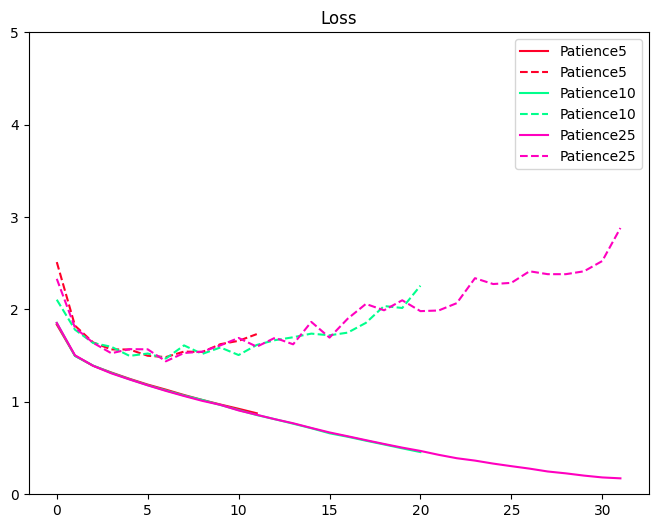

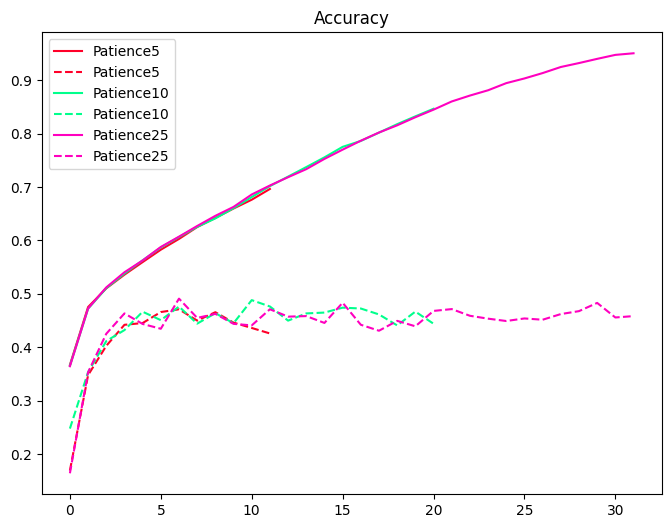

In [11]:
from matplotlib import cm as mplcm
from matplotlib import colors

NUM_COLORS = 3

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()